### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [13]:
df = pd.read_csv('coupons.csv')

In [14]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [9]:
# Checking for blank values
df.isna().sum().sort_values(ascending=False)

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
Y                           0
maritalStatus               0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
occupation                  0
has_children                0
education                   0
direction_opp               0
income                      0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
destination                 0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
# Fill in columns that have missing values
cols_with_missing = ['car', 'CoffeeHouse', 'Restaurant20To50', 
                     'CarryAway', 'RestaurantLessThan20', 'Bar']

df[cols_with_missing] = df[cols_with_missing].fillna('Unknown')

# Confirm cleanup
print(df.isna().sum().sort_values(ascending=False).head(10))


Y                0
direction_opp    0
passanger        0
weather          0
temperature      0
time             0
coupon           0
expiration       0
gender           0
age              0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [11]:
#Do most people accept or reject the coupon?
counts = df['Y'].value_counts().sort_index()
percentages = counts / counts.sum() * 100

print(counts)
print(percentages)


0    5474
1    7210
Name: Y, dtype: int64
0    43.156733
1    56.843267
Name: Y, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

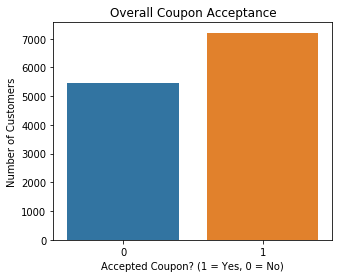

In [12]:
#Coupon Acceptance Visualized

plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Y')
plt.title('Overall Coupon Acceptance')
plt.xlabel('Accepted Coupon? (1 = Yes, 0 = No)')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
# 57% of Customes accept the coupon

6. Use a histogram to visualize the temperature column.

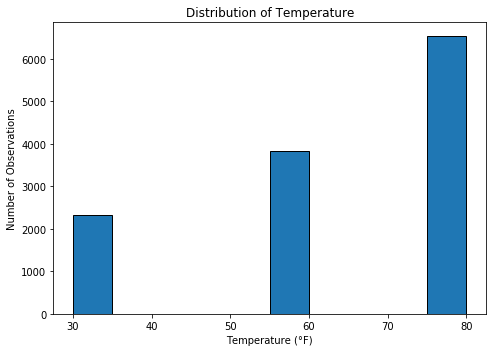

In [13]:
#Temperrature Histograms
vals = df['temperature'].dropna()
plt.figure(figsize=(7,5))
plt.hist(vals, bins=10, edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Observations')
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [23]:
bar_coupons = df[df['coupon'] == 'Bar']

print("Number of Bar coupon entries:", len(bar_coupons))

Number of Bar coupon entries: 2017


2. What proportion of bar coupons were accepted?


accepted_bar:41.0%


Text(0,0.5,'Number of Drivers')

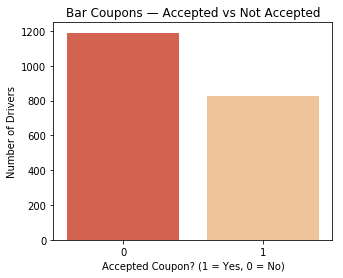

In [24]:
#Bar Coupon Acceptance

accepted_bar = bar_coupons['Y'].mean() *100   
print(f"accepted_bar:{accepted_bar:.1f}%")

plt.figure(figsize=(5,4))
sns.countplot(data=bar_coupons, x='Y', palette='OrRd_r')
plt.title('Bar Coupons — Accepted vs Not Accepted')
plt.xlabel('Accepted Coupon? (1 = Yes, 0 = No)')
plt.ylabel('Number of Drivers')

#Less than half of drivers will accept a coupon for a bar immediately or sometime before it expires, indicating only a minority are interested in discounts from bars.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [25]:

# Calculate acceptance rate for each Bar category
bar_coupons = df[df['coupon'] == 'Bar'].copy()
bar_coupons.loc[:, 'Bar'] = bar_coupons['Bar'].fillna('Unknown')
bar_type_accept = (
    bar_coupons.groupby('Bar')['Y']
    .mean()
    .mul(100)
    .round(1)
    .sort_index()
)

print(bar_type_accept)


#Drivers who visit a bar at least once a month will accept the coupon at minimum 65% of the time.

Bar
1~3        64.7
4~8        78.0
Unknown    38.1
gt8        73.5
less1      44.4
never      18.8
Name: Y, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Frequent bar-goers over 25: 61.4%
All others: 41.0%
61% of drivers over 25 who visit a bar at least once month accept the coupon, suggesting broad appeal for these promotions.


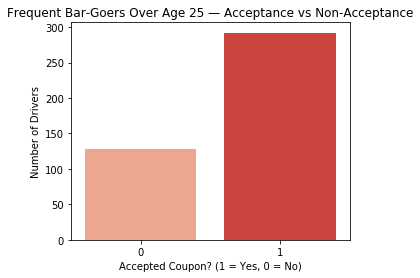

In [30]:
# Clean up any missing value
df['Bar'] = df['Bar'].fillna('Unknown')
df['age'] = df['age'].fillna('Unknown')

frequent_bar = ['1~3', '4~8', 'gt8']

# Create new DataFrame: drivers who go to bars more than once/month and are over 25
bar_over25 = df[(df['Bar'].isin(frequent_bar)) & (df['age'] != '21') & (df['age'] != '26') & (df['age'] != 'Below21')]

# Acceptance among over-25 who are frequent bar-goers
accept_rate_target = bar_over25['Y'].mean() * 100

# Acceptance among everyone else
accepted_bar = bar_coupons['Y'].mean() * 100

print(f"Frequent bar-goers over 25: {accept_rate_target:.1f}%")
print(f"All others: {accepted_bar:.1f}%")


bar_25plus = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['age'].isin(['26','31','36','41','46','50plus']))
]

plt.figure(figsize=(5,4))
sns.countplot(data=bar_25plus, x='Y', palette='Reds')
plt.title('Frequent Bar-Goers Over Age 25 — Acceptance vs Non-Acceptance')
plt.xlabel('Accepted Coupon? (1 = Yes, 0 = No)')
plt.ylabel('Number of Drivers')


print("61% of drivers over 25 who visit a bar at least once month accept the coupon, suggesting broad appeal for these promotions.")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Frequent bar-goers (non-kid passengers, non-farming jobs): 62.2%
All others: 41.0%


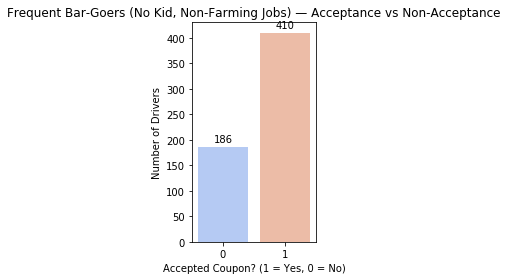

62% of the frequent bar visitors did not have child passenger nor worked farm jobs, indictaing lifstyles with more leisure time.


In [29]:
# Clean up missing values
df['passanger'] = df['passanger'].fillna('Unknown')
df['occupation'] = df['occupation'].fillna('Unknown')

# Define frequent bar-goers
frequent_bar = ['1~3', '4~8', 'gt8']

# Define the excluded occupations
excluded_jobs = ['Farming', 'Fishing', 'Forestry']

# Create new DataFrame: goes to bar > once/month, passenger not 'Kid', occupation not in excluded list
target_group = df[
    (df['Bar'].isin(frequent_bar)) &
    (df['passanger'] != 'Kid') &
    (~df['occupation'].isin(excluded_jobs))
].copy()

# Acceptance rate among target group
accept_target = target_group['Y'].mean() * 100

# Acceptance rate among everyone else
accepted_bar = bar_coupons['Y'].mean() * 100

print(f"Frequent bar-goers (non-kid passengers, non-farming jobs): {accept_target:.1f}%")
print(f"All others: {accepted_bar:.1f}%")

bar_no_kids_nonfarm = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['passanger'] != 'Kid') &
    (~bar_coupons['occupation'].isin(['Farming', 'Fishing', 'Forestry']))
]

plt.figure(figsize=(5,4))
sns.countplot(data=bar_no_kids_nonfarm, x='Y', palette='coolwarm')
plt.title('Frequent Bar-Goers (No Kid, Non-Farming Jobs) — Acceptance vs Non-Acceptance')
plt.xlabel('Accepted Coupon? (1 = Yes, 0 = No)')
plt.ylabel('Number of Drivers')

for p in plt.gca().patches:
    plt.text(p.get_x()+p.get_width()/2, p.get_height()+10,
             int(p.get_height()), ha='center', fontsize=10)
plt.tight_layout()
plt.show()

print("62% of the frequent bar visitors did not have child passenger nor worked farm jobs, indictaing lifstyles with more leisure time.")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Frequent bar-goers under 30: 62.8%
All others: 41.0%


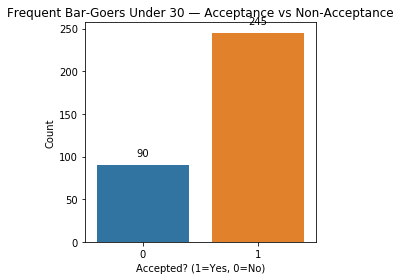

63% of bar patrons who go to bars > once/month and under 30 would accept a bar coupon, indicating strong appeal from younger drivers.


In [28]:
#Compare the acceptance rates between those drivers who: go to bars more than once a month and are under the age of 30

# Define frequent bar-goers
frequent_bar = ['1~3', '4~8', 'gt8']

# Define what counts as "under 30"
under30 = ['Below21', '21', '26']   # adjust if your dataset uses numeric ages

# Create new DataFrame: go to bars more than once a month and are under the age of 30
bar_under30 = df[(df['Bar'].isin(frequent_bar)) & (df['age'].isin(under30))].copy()

# Acceptance among under-30 frequent bar-goers
accept_rate_young = bar_under30['Y'].mean() * 100

# Acceptance among everyone else
accepted_bar = bar_coupons['Y'].mean() * 100

print(f"Frequent bar-goers under 30: {accept_rate_young:.1f}%")
print(f"All others: {accepted_bar:.1f}%")

bar_under30 = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3','4~8','gt8'])) &
    (bar_coupons['age'].isin(['Below21','21','26']))
]

plt.figure(figsize=(5,4))
sns.countplot(data=bar_under30, x='Y')
plt.title('Frequent Bar-Goers Under 30 — Acceptance vs Non-Acceptance')
plt.xlabel('Accepted? (1=Yes, 0=No)')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.text(p.get_x()+p.get_width()/2, p.get_height()+10, int(p.get_height()),
             ha='center', fontsize=10)
plt.tight_layout()
plt.show()

print("63% of bar patrons who go to bars > once/month and under 30 would accept a bar coupon, indicating strong appeal from younger drivers.")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#Based on the initial observations people who accept bar coupons are less likely to have children and have more leisure time.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [23]:
#Percentage Acceptance by Coupon Type

accept_rate = (
    df.groupby('coupon')['Y']
      .mean()                # mean of 1s = percentage accepted
      .sort_values(ascending=False)
      * 100
)
print(accept_rate)

coupon
Carry out & Take away    73.547848
Restaurant(<20)          70.710696
Coffee House             49.924925
Restaurant(20-50)        44.101877
Bar                      41.001487
Name: Y, dtype: float64


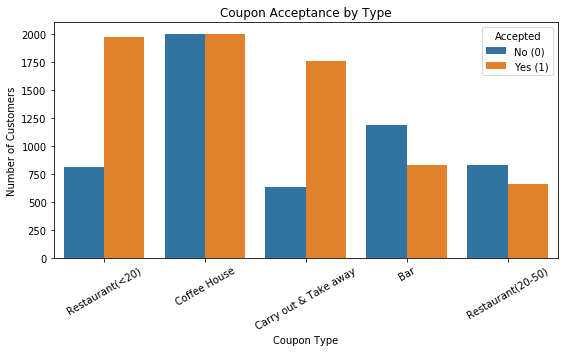

In [24]:
#Which types of coupons are people most likely to accept?

#Coupon Acceptance by type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='coupon', hue='Y')
plt.title('Coupon Acceptance by Type')
plt.xlabel('Coupon Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=30)
plt.legend(title='Accepted', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

In [16]:
# Create a new DataFrame with only coffee house coupons
coffee_coupons = df[df['coupon'] == 'Coffee House'].copy()

# See how many rows it has
print("Number of Coffee House coupon rows:", len(coffee_coupons))
coffee_coupons.head()

Number of Coffee House coupon rows: 3996


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


Males who accepted Coffee House coupons: 985
Male acceptance rate (Coffee House): 50.6%


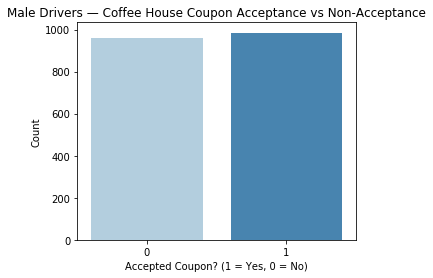

Men and women equally accepted coupon from a coffee house, suggesting no gender bias in accepting coffee house coupons.


In [34]:
#Accepted Coffee House Coupon by Gender

#males who accepted (Y = 1)
male_rows = coffee_coupons[coffee_coupons['gender'].fillna('Unknown') == 'Male']

#Count how many males accepted
num_males_accepted = int((male_rows['Y'] == 1).sum())

# Compute male acceptance rate
male_accept_rate = male_rows['Y'].mean() * 100  # mean of 0/1

print(f"Males who accepted Coffee House coupons: {num_males_accepted}")
print(f"Male acceptance rate (Coffee House): {male_accept_rate:.1f}%")

# Count accepted (1) vs not accepted (0)
male_accept_counts = male_rows['Y'].value_counts().sort_index()

# Plot
plt.figure(figsize=(5,4))
sns.barplot(x=male_accept_counts.index, y=male_accept_counts.values, palette='Blues')
plt.title('Male Drivers — Coffee House Coupon Acceptance vs Non-Acceptance')
plt.xlabel('Accepted Coupon? (1 = Yes, 0 = No)')
plt.ylabel('Count')

plt.show()

print("Men and women equally accepted coupon from a coffee house, suggesting no gender bias in accepting coffee house coupons.")

Acceptance rate among people who never visit coffee houses: 18.9%


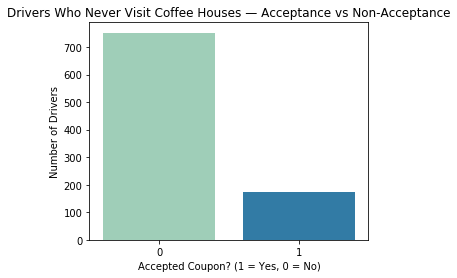

Drivers who never visited a coffee house only acecepted a coupon 20% of the time, meaning minimal interest from drivers without a history of coffee house patronage.


In [20]:
#Percentage of those who never visited a Coffee House that accepted the Coffee House Coupon

# Number of Never visitors
never_visitors = coffee_coupons[coffee_coupons['CoffeeHouse'] == 'never']

# % of never-visitors who accepted (Y = 1)
accept_rate_never = never_visitors['Y'].mean() * 100

print(f"Acceptance rate among people who never visit coffee houses: {accept_rate_never:.1f}%")

# Count accepted (1) vs not accepted (0)
never_accept_counts = never_visitors['Y'].value_counts().sort_index()

# Plot
plt.figure(figsize=(5,4))
sns.barplot(x=never_accept_counts.index, y=never_accept_counts.values, palette='YlGnBu')
plt.title('Drivers Who Never Visit Coffee Houses — Acceptance vs Non-Acceptance')
plt.xlabel('Accepted Coupon? (1 = Yes, 0 = No)')
plt.ylabel('Number of Drivers')

plt.show()

print("Drivers who never visited a coffee house only acecepted a coupon 20% of the time, meaning minimal interest from drivers without a history of coffee house patronage.")

Males who never visit coffee houses — accepted: 20.7%


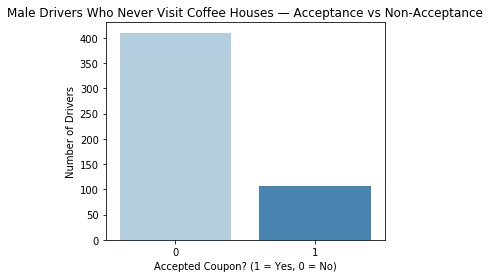

Male drivers who never visited a coffee house showed minimal interest in the coupon, consistent with prior findings and no gender bias.


In [33]:
#Percentage of those who never visited a Coffee House that accepted the Coffee House Coupon that are Male

male_never = coffee_coupons[
    (coffee_coupons['gender'] == 'Male') &
    (coffee_coupons['CoffeeHouse'] == 'never')
].copy()

# Compute stats
n_total = len(male_never)
n_accept = int((male_never['Y'] == 1).sum())
rate = male_never['Y'].mean() * 100 if n_total > 0 else float('nan')

print(f"Males who never visit coffee houses — accepted: {rate:.1f}%" )

# Count accepted (1) vs not accepted (0)
male_never_accept_counts = male_never['Y'].value_counts().sort_index()

# Plot
plt.figure(figsize=(5,4))
sns.barplot(x=male_never_accept_counts.index, y=male_never_accept_counts.values, palette='Blues')
plt.title('Male Drivers Who Never Visit Coffee Houses — Acceptance vs Non-Acceptance')
plt.xlabel('Accepted Coupon? (1 = Yes, 0 = No)')
plt.ylabel('Number of Drivers')

plt.show()

print("Male drivers who never visited a coffee house showed minimal interest in the coupon, consistent with prior findings and no gender bias.")